# AFM CBIR: A Functional Example

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import cv2
from sklearn.decomposition import PCA
from optical_reverse_image_search.models.simclr import SimCLR_inference
from optical_reverse_image_search.models.moco import MoCo_inference
from optical_reverse_image_search.models.dino import DINO_inference
from optical_reverse_image_search.models.siftBOW import siftBOW_inference
from tqdm import tqdm
import os
import sys
%matplotlib inline

First, we show the AFM files in question. These are saved as `.png` files, however raw AFM files can also be used.

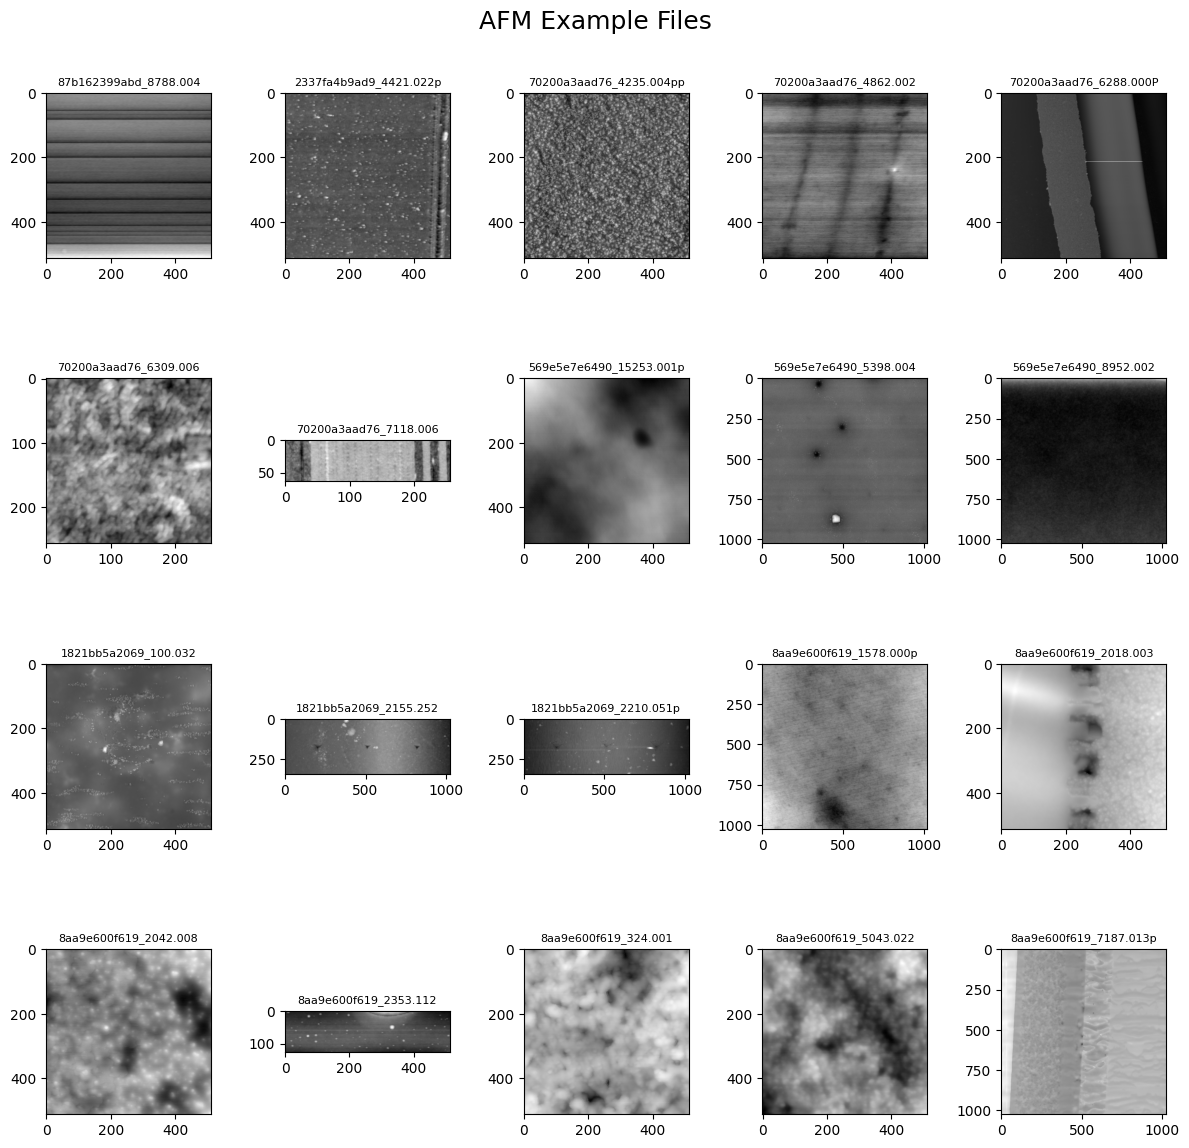

In [13]:
fig, axs = plt.subplots(4,5,figsize=(12,12))

counter = 0

for i in list(sorted(os.listdir('test_data'))):
    axs[int(counter/5)][counter % 5].imshow(cv2.imread(os.path.join('test_data',i)))
    axs[int(counter/5)][counter % 5].set_title(i.replace('__height.png','').replace('data_file_','').split('-')[-1],fontsize=8)
    counter+=1
plt.suptitle('AFM Example Files',fontsize=18)
plt.tight_layout()
plt.show()


We first perform an embedding using MoCo, with an input size of $128 \times 128$ and a latent dimension of size 32.
We show both the cosine similarity between image embeddings as well as a principal component analysis (PCA) plot of the embeddings.

In [2]:
MOCO_model = MoCo_inference(model_file='moco_in128_ls32.pth',input_size=128,latent_size=32)

MOCO_embeddings = []
for i in list(sorted(os.listdir('test_data'))):
    MOCO_embeddings.append(MOCO_model.infer(input_file=os.path.join('test_data',i)).flatten())
MOCO_embeddings = np.array(MOCO_embeddings)


/home/meschw04/optical_reverse_image_search/optical_reverse_image_search/models/moco.py:160: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.l

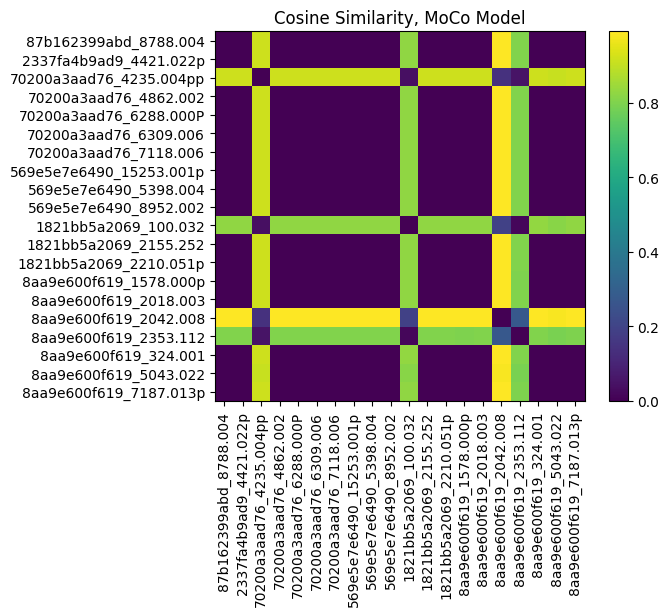

In [8]:
all_cos_distances = []
for i in MOCO_embeddings:
    cos_sub = []
    for j in MOCO_embeddings:
        cos_sub.append(cosine(i,j))
    all_cos_distances.append(cos_sub)
all_ticks = [i.replace('__height.png','').replace('data_file_','').split('-')[-1] for i in list(sorted(os.listdir('test_data')))]
plt.imshow(all_cos_distances)
plt.colorbar()
plt.xticks(range(len(all_ticks)),all_ticks,rotation=90)
plt.yticks(range(len(all_ticks)),all_ticks)
plt.title('Cosine Similarity, MoCo Model')
plt.show()

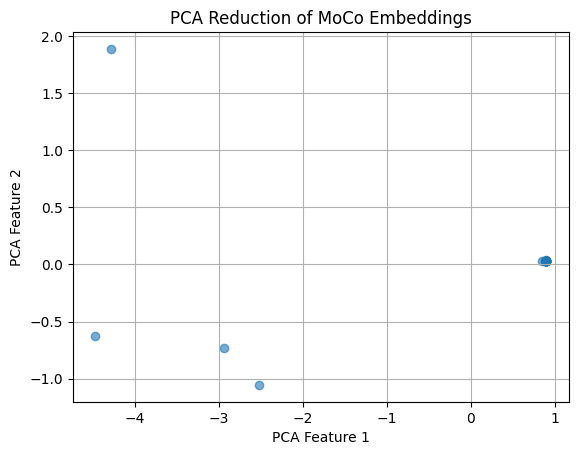

In [15]:
MOCO_PCA = PCA().fit_transform(MOCO_embeddings)
plt.scatter(MOCO_PCA.T[0],MOCO_PCA.T[1],alpha=0.6)
plt.grid()
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA Reduction of MoCo Embeddings')
plt.show()

We first perform an embedding using SIFT BOW, with a latent dimension of size 32 and an arbitrary input size.
We show both the cosine similarity between image embeddings as well as a principal component analysis (PCA) plot of the embeddings.

In [17]:
SIFT_model = siftBOW_inference(cluster_npy='sift_bag_of_words_32.npy')

SIFT_embeddings = []
for i in list(sorted(os.listdir('test_data'))):
    SIFT_embeddings.append(SIFT_model.infer(input_file=os.path.join('test_data',i)).flatten())
SIFT_embeddings = np.array(SIFT_embeddings)


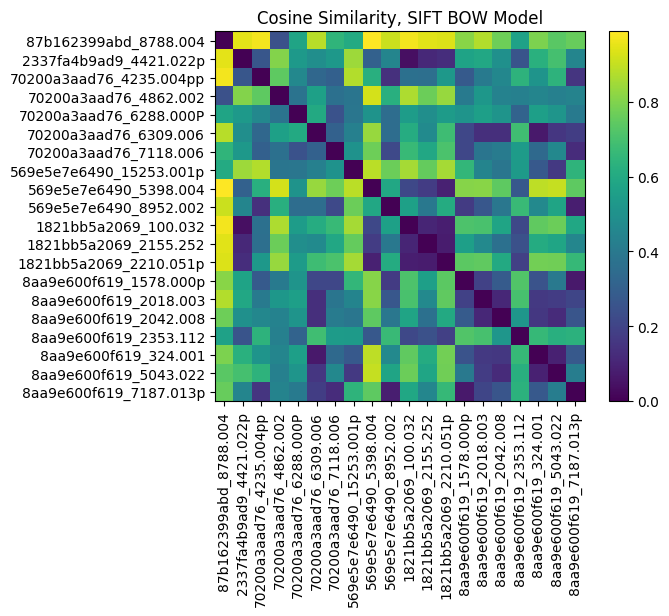

In [18]:
all_cos_distances = []
for i in SIFT_embeddings:
    cos_sub = []
    for j in SIFT_embeddings:
        cos_sub.append(cosine(i,j))
    all_cos_distances.append(cos_sub)
all_ticks = [i.replace('__height.png','').replace('data_file_','').split('-')[-1] for i in list(sorted(os.listdir('test_data')))]
plt.imshow(all_cos_distances)
plt.colorbar()
plt.xticks(range(len(all_ticks)),all_ticks,rotation=90)
plt.yticks(range(len(all_ticks)),all_ticks)
plt.title('Cosine Similarity, SIFT BOW Model')
plt.show()

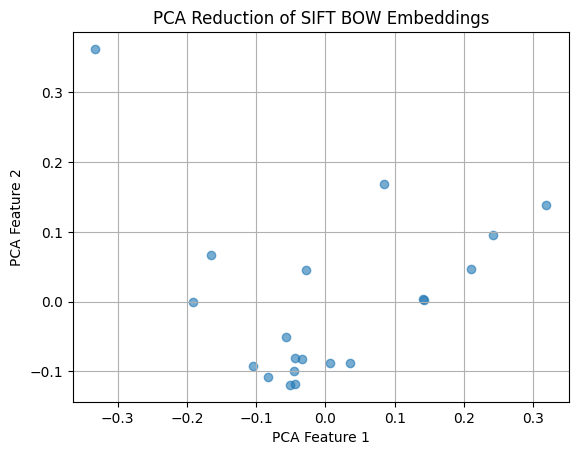

In [19]:
SIFT_PCA = PCA().fit_transform(SIFT_embeddings)
plt.scatter(SIFT_PCA.T[0],SIFT_PCA.T[1],alpha=0.6)
plt.grid()
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA Reduction of SIFT BOW Embeddings')
plt.show()